<a href="https://colab.research.google.com/github/shivang2607/Machine-Learning-/blob/main/Neural_network_regression_(tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import numpy as np

2.6.0


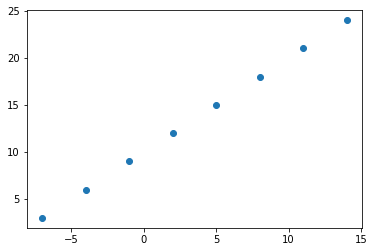

In [ ]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualising
#plt.subplot(1,2,1)
#plt.plot(X, y)
#plt.subplot(1,2,2)
plt.scatter(X, y)

In [ ]:
y = X + 10

# Input and output shapes

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape =y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
#turn numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)
X, y
X.ndim, y.ndim

(1, 1)

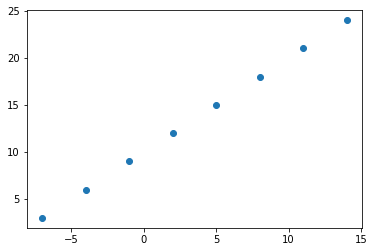

In [ ]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

In [ ]:
#Set random seed
tf.random.set_seed(42)

#creating a model using a sequential API
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# OR model.add(tf.keras.layers.Dense(1))                (instead of passing set can use add function also)

#2. compile the model
model.compile(loss = tf.keras.losses.mae,#mae = mean absolute error its basically theta i.e. (y - H(x))
            optimizer = tf.keras.optimizers.SGD(),
            metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 578ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 10

array([[22.71602]], dtype=float32)

##Improving our model


In [ ]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation="relu"),
      tf.keras.layers.Dense(1)
])

model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=  0.01),
              metrics = ["mae"]
)

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 370ms/step - loss: 13.9468 - mae: 13.9468
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9863 - mae: 12.9863
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0173 - mae: 12.0173
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.1308 - mae: 11.1308
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3345 - mae: 10.3345
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 9.5212 - mae: 9.5212
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.6917 - mae: 8.6917
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.8487 - mae: 7.8487
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9853 - mae: 6.9853
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.0979 - mae: 6.0979
Epoch 11/100
1/1 [==============================] - 0s 6ms/step 

In [ ]:
model.predict([17.0]) #precesion badh gaya bhot, yeahhh!!


array([[25.941917]], dtype=float32)

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# Evaluating a model

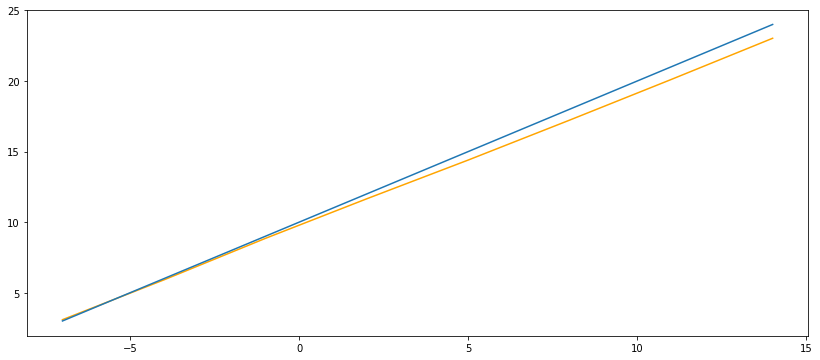

In [ ]:
#plt.scatter(X, model.predict(X), color = 'red')
plt.figure(figsize = (14, 6))
plt.plot(X, model.predict(X), color = 'orange')   #predicted by our model
plt.plot(X, y)

In [ ]:
#make a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for dataset
y = X + 10

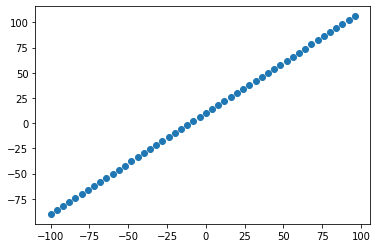

In [ ]:
#Visualise data
plt.scatter(X, y)

In [ ]:
### The 3 sets...(dividing our data in 3 groups, for training model, for validation and for testing)

#Split the data into train and test tests
X_train = X[:40]   #first 40 samples
y_train = y[:40]

X_test = X[40:]   # last 10 data  sets
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

# Visualising data

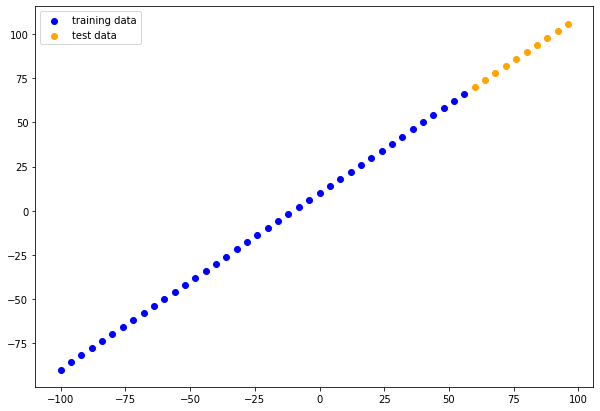

In [ ]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c = "b", label = "training data")
plt.scatter(X_test, y_test, c = "orange", label = "test data")
plt.legend()

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 6.7210 - mae: 6.7210
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 4.7799 - mae: 4.7799
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 3.6836 - mae: 3.6836
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 3.6227 - mae: 3.6227
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 2.6543 - mae: 2.6543
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 3.6130 - mae: 3.6130
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 1.9372 - mae: 1.9372
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 2.5883 - mae: 2.5883
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 3.0042 - mae: 3.0042
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 3.4682 - mae: 3.4682
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0597

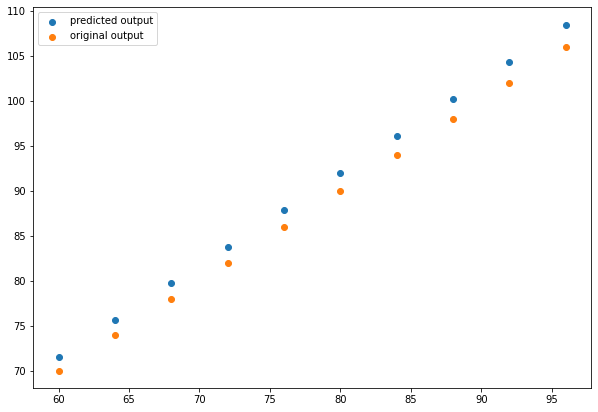

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(X_test, model.predict(X_test), label ="predicted output")
plt.scatter(X_test, y_test, label ="original output" )
plt.legend()

In [ ]:
# Build model again

#1 create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2 compile the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
              )

#Fit the model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8160 - mae: 8.8160
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4374 - mae: 9.4374
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9512 - mae: 11.9512
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1800 - mae: 9.1800
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0313 - mae: 10.0313
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3097 - mae: 9.3097
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.4690 - mae: 8.4690
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0316 - mae: 9.0316
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.5057 - mae: 18.5057
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9744 - mae: 9.9744
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 8

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#create a model which builds automatically by defining the input_shape argument

tf.random.set_seed(42)

#create a model
model = tf.keras.Sequential([
                tf.keras.layers.Dense(3, activation = "relu"),
                tf.keras.layers.Dense(1, input_shape = [1])

])

#2 compiling the  model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = .01),
              metrics = ["mae"])

In [ ]:
#lets fit our model to the trining data
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


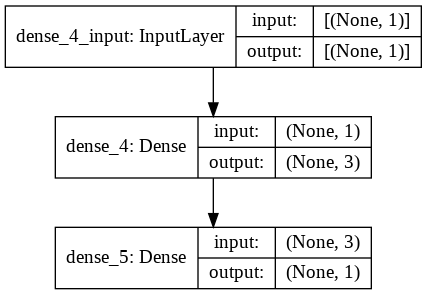

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

# Visualising our model's prediction

In [ ]:
y_preds = model.predict(X_test)
y_preds

array([[ 73.486855],
       [ 78.20668 ],
       [ 82.926506],
       [ 87.64633 ],
       [ 92.36616 ],
       [ 97.08598 ],
       [101.8058  ],
       [106.525635],
       [111.24545 ],
       [115.96528 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds
                     ):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c = "b", label = "Training data")
  plt.scatter(test_data, test_labels, c = "g", label= "Testing data")

  plt.scatter(test_data, predictions, c="r", label =  "Predictions")

  plt.legend()

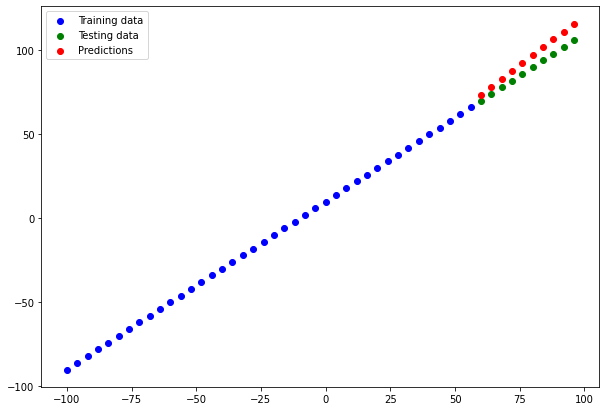

In [ ]:
plot_predictions()


In [ ]:
### Evaluating our model's

### Evaluating our model's prediction with regression evaluation metrics

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 127ms/step - loss: 6.7261 - mae: 6.7261


[6.726067543029785, 6.726067543029785]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred = tf.constant(y_preds))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.210516 , 12.3173275, 10.614698 , 10.       , 10.473231 ,
       12.034393 , 14.683481 , 18.525635 , 23.245453 , 27.965277 ],
      dtype=float32)>

In [ ]:
tf.constant(y_preds)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 73.486855],
       [ 78.20668 ],
       [ 82.926506],
       [ 87.64633 ],
       [ 92.36616 ],
       [ 97.08598 ],
       [101.8058  ],
       [106.525635],
       [111.24545 ],
       [115.96528 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 73.486855,  78.20668 ,  82.926506,  87.64633 ,  92.36616 ,
        97.08598 , 101.8058  , 106.525635, 111.24545 , 115.96528 ],
      dtype=float32)>

In [ ]:
#calcualte mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred = tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.726068>

In [ ]:
#calculate mean square error
tf.metrics.mean_squared_error(y_true = y_test,
                              y_pred = tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=49.514713>

In [ ]:
# Make som functions to reuse MAE and MSE
def mae(y_true, y_preds):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred = tf.squeeze(y_preds))

def mse(y_true, y_preds):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred = tf.squeeze(y_preds))



# Running experiments to improve model

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Build model 1

tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

model_1.compile( loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"]

)

model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

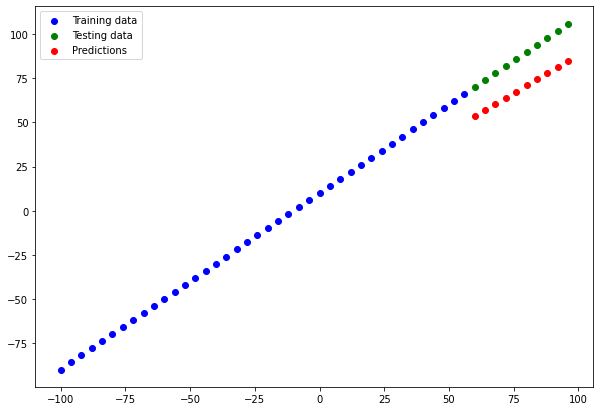

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
# Calcualte model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1).numpy()
mse_1 = mse(y_test, y_preds_1).numpy()
mae_1, mse_1

(18.745327, 353.57336)

In [ ]:
## Build model_2

#2 dense layers
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)]
)

model_2.compile( loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"]

)

model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

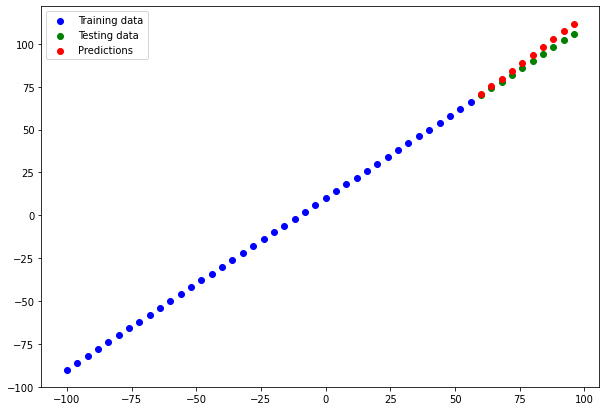

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2= mae(y_test, y_preds_2).numpy()
mse_2= mse(y_test, y_preds_2).numpy()
mae_2, mse_2

(3.1969407, 13.070143)

In [ ]:
# build model_3

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae']
                )

model_3.fit(X_train, y_train, epochs = 500, verbose=0)

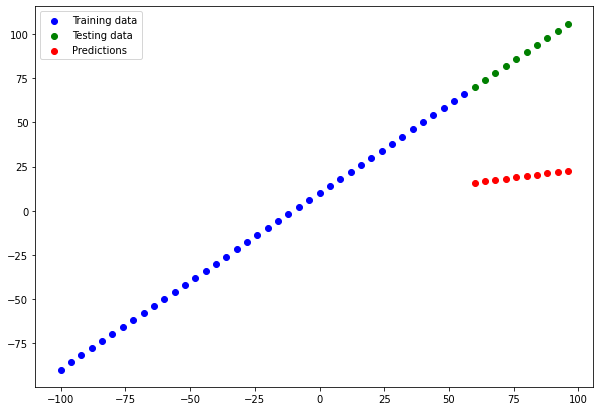

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)



In [ ]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.713615, 4808.0273)

# Comparing the results of our experiments

In [ ]:
# comparing our models using pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


# Saving our models

In [ ]:
# Save model using save model format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
#Save model using hdf5 format
model_2.save("best_model_hdf5_format.h5")

In [ ]:
## Loading in the savedmodel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Loading in the hdf5 format model
loaded_h5_model = tf.keras.models.load_model("best_model_hdf5_format.h5")
loaded_h5_model.summary() == model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


True

In [ ]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds = model_2.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download a model from colab

In [ ]:
from google.colab import files
files.download("/content/best_model_hdf5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# A larger Example

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = insurance_one_hot.drop("charges", axis =1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y = insurance_one_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)



(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])


insurance_model.compile( loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"]

)

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
#checkthe results on insurance model on the test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                tf.keras.layers.Dense(100),
                tf.keras.layers.Dense(10),
                tf.keras.layers.Dense(1)
])


insurance_model_2.compile( loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"]

)
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 7082.6064 - mae: 7082.6064
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7109.6387 - mae: 7109.6387
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6965.5278 - mae: 6965.5278
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7129.9658 - mae: 7129.9658
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7353.8735 - mae: 7353.8735
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7174.7407 - mae: 7174.7407
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7057.5757 - mae: 7057.5757
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7250.5532 - mae: 7250.5532
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7115.3018 - mae: 7115.3018
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7036.9839 - mae: 7036.9839

In [ ]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100),
                    tf.keras.layers.Dense(10),
                    tf.keras.layers.Dense(1)
])

insurance_model_3.compile( loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"]

)
history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

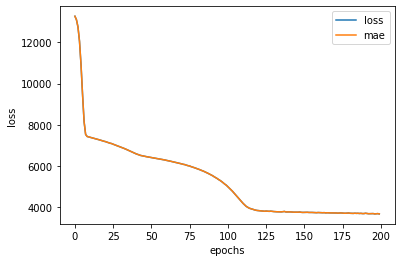

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

#Preprocessing data (normalization and standardization)


In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


#Create a colun transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
                    tf.keras.layers.Dense(100, activation = "relu"),
                    tf.keras.layers.Dense(10, activation = "relu"),
                    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"]

)

insurance_model_4.fit(X_train_normal, y_train, epochs = 125)

Epoch 1/125
34/34 [==============================] - 0s 2ms/step - loss: 13345.8438 - mae: 13345.8438
Epoch 2/125
34/34 [==============================] - 0s 1ms/step - loss: 13344.8076 - mae: 13344.8076
Epoch 3/125
34/34 [==============================] - 0s 2ms/step - loss: 13342.0537 - mae: 13342.0537
Epoch 4/125
34/34 [==============================] - 0s 2ms/step - loss: 13335.3760 - mae: 13335.3760
Epoch 5/125
34/34 [==============================] - 0s 1ms/step - loss: 13322.0186 - mae: 13322.0186
Epoch 6/125
34/34 [==============================] - 0s 2ms/step - loss: 13299.2080 - mae: 13299.2080
Epoch 7/125
34/34 [==============================] - 0s 2ms/step - loss: 13264.1064 - mae: 13264.1064
Epoch 8/125
34/34 [==============================] - 0s 2ms/step - loss: 13213.4258 - mae: 13213.4258
Epoch 9/125
34/34 [==============================] - 0s 2ms/step - loss: 13144.3154 - mae: 13144.3154
Epoch 10/125
34/34 [==============================] - 0s 2ms/step - loss: 13054.60

In [ ]:
#evaluating insurance model

insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3531.7395 - mae: 3531.7395


[3531.739501953125, 3531.739501953125]

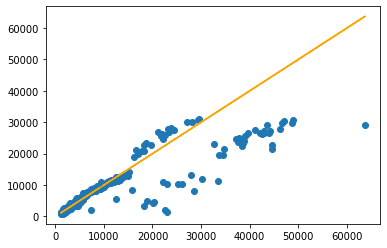

In [ ]:
line_x = np.arange(0, 20000)
plt.scatter(y_test, insurance_model_4.predict(X_test_normal))
plt.plot(y_test, y_test, c = "orange")

# Excercise (from california housing test data)

In [ ]:
housing_data_train = pd.read_csv("/content/sample_data/california_housing_train.csv")

housing_data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
X_house_train = housing_data_train.drop("median_house_value", axis = 1)
X_house_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [ ]:
y_house_train = housing_data_train["median_house_value"]
y_house_train

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [ ]:
# creating our model
tf.random.set_seed(42)

house_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)]
)

house_model.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(learning_rate=.1),
                    metrics = ["mae"])



In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population",	"households",	"median_income"]))

ct.fit(X_house_train)


X_house_train_normal = ct.transform(X_house_train)



In [ ]:
history = house_model.fit(X_house_train_normal, y_house_train, epochs = 50)

Epoch 1/50
532/532 [==============================] - 1s 2ms/step - loss: 80668.9297 - mae: 80668.9297
Epoch 2/50
532/532 [==============================] - 1s 2ms/step - loss: 53292.1562 - mae: 53292.1562
Epoch 3/50
532/532 [==============================] - 1s 2ms/step - loss: 50568.5430 - mae: 50568.5430
Epoch 4/50
532/532 [==============================] - 1s 2ms/step - loss: 48391.4297 - mae: 48391.4297
Epoch 5/50
532/532 [==============================] - 1s 2ms/step - loss: 47223.9961 - mae: 47223.9961
Epoch 6/50
532/532 [==============================] - 1s 2ms/step - loss: 46864.5469 - mae: 46864.5469
Epoch 7/50
532/532 [==============================] - 1s 2ms/step - loss: 46567.1406 - mae: 46567.1406
Epoch 8/50
532/532 [==============================] - 1s 2ms/step - loss: 46307.7305 - mae: 46307.7305
Epoch 9/50
532/532 [==============================] - 1s 2ms/step - loss: 46308.5195 - mae: 46308.5195
Epoch 10/50
532/532 [==============================] - 1s 2ms/step - loss

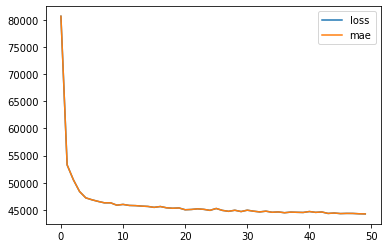

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
housing_data_test = pd.read_csv("/content/sample_data/california_housing_test.csv")
housing_data_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
X_house_test = housing_data_test.drop("median_house_value", axis= 1)
y_house_test = housing_data_test["median_house_value"]

X_house_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375


In [ ]:
house_model.evaluate(ct.transform(X_house_test), y_house_test)

94/94 [==============================] - 0s 1ms/step - loss: 44238.2969 - mae: 44238.2969


[44238.296875, 44238.296875]

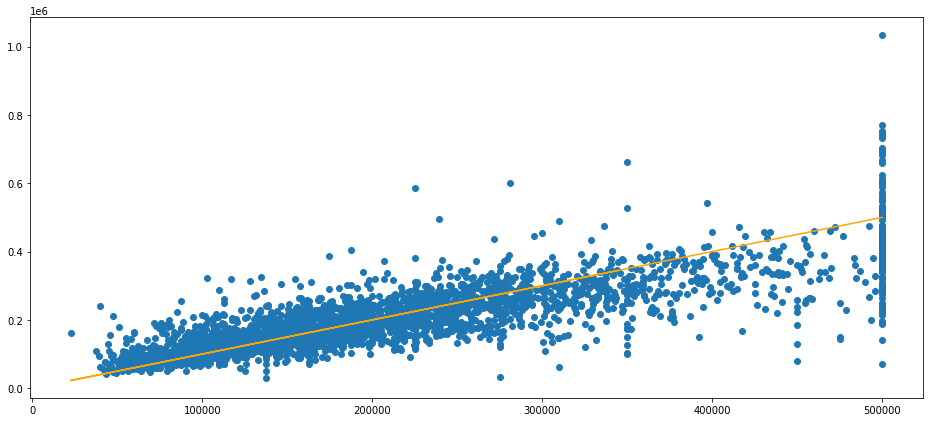

In [ ]:
plt.figure(figsize = (16, 7))
plt.plot(y_house_test, y_house_test, c = "orange")
plt.scatter(y_house_test, house_model.predict(ct.transform(X_house_test)))

In [ ]:
house_model.evaluate(ct.transform(X_house_test), y_house_test)

94/94 [==============================] - 0s 1ms/step - loss: 44238.2969 - mae: 44238.2969


[44238.296875, 44238.296875]